In [1]:
## IMPORTS ##
import numpy as np
from pathlib import Path
import yt
import matplotlib.pyplot as plt
import sys
import pwlf
sys.path.append("../FLASH")

from fitting_functions import Ray 

yt : [INFO     ] 2025-07-29 12:02:45,257 Loading plugins from /home/dschneidinger/.config/yt/my_plugins.py
yt : [WARNING  ] 2025-07-29 12:02:45,258 Field ('flash', 'idens') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2025-07-29 12:02:45,258 Field ('flash', 'edens') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2025-07-29 12:02:45,258 Field ('flash', 'Ex') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2025-07-29 12:02:45,258 Field ('flash', 'Ey') already exists. To override use `force_override=True`.
yt : [WARNING  ] 2025-07-29 12:02:45,258 Field ('flash', 'Ez') already exists. To override use `force_override=True`.
yt : [INFO     ] 2025-07-29 12:02:45,281 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2025-07-29 12:02:45,281 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2025-07-29 12:02:45,281 Parameters: domain_left_edge          = [-0.6   -0.075 -0


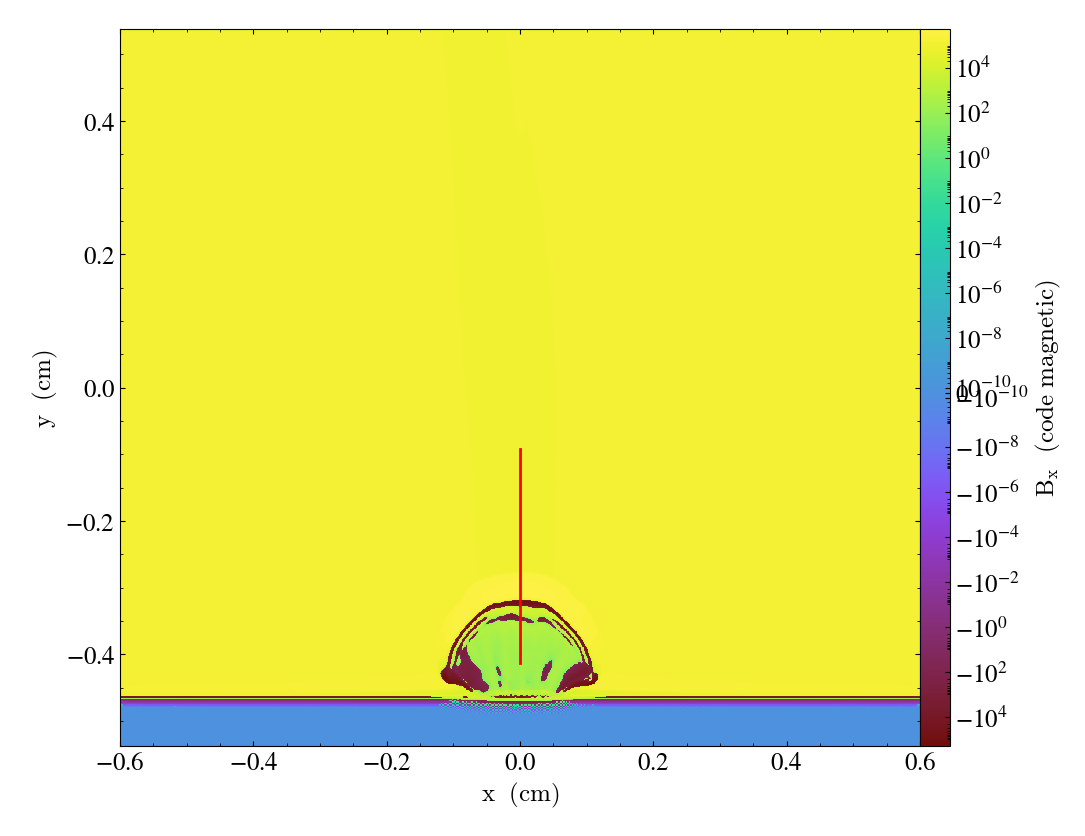

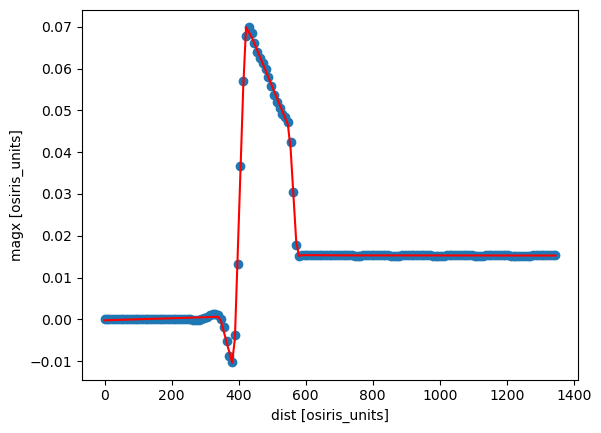

In [5]:
## Path to FLASH data. This data was chosen because it's generally a simple setup.
## We want to characterize the fundamental behavior of a pison expanding out into a magnetized background. 
data_path = Path("/mnt/cellar/shared/simulations/FLASH_MagShockZ3D-Trantham_06-2024/MAGON/MagShockZ_hdf5_chk_0005")

# Use the plugin I built for yt to load in FLASH data and split up ion species.
yt.enable_plugins()

ds = yt.load_for_osiris(data_path, rqm_factor = 10)

start_point = (0,0.05,0)
end_point = (0,0.37,0)

lineout = Ray(ds, start_point, end_point)

lineout.show_ray("magx")

fit_result = lineout.fit("magx", degree=10, fit_func="piecewise", plot=True)

'if(x2 < 4.07190e+02, x2*(4.96565e-17) + (-3.35868e-13), if(x2 < 4.09315e+02, x2*(4.32186e+00) + (-1.75982e+03), if(x2 < 4.23895e+02, x2*(-3.48926e-01) + (1.52003e+02), if(x2 < 5.02309e+02, x2*(-2.84545e-03) + (5.30110e+00), if(x2 < 5.58585e+02, x2*(8.74015e-04) + (3.43278e+00), if(x2 < 5.72866e+02, x2*(-1.75773e-01) + (1.02105e+02), if(x2 < 7.16425e+02, x2*(-3.24862e-04) + (1.59675e+00), if(x2 < 8.90761e+02, x2*(1.20696e-03) + (4.99309e-01), if(x2 < 1.17677e+03, x2*(-7.46131e-05) + (1.64089e+00), if(x2 < 1.34491e+03, x2*(-6.98756e-04) + (2.37536e+00), 2.3753607256568525))))))))))'

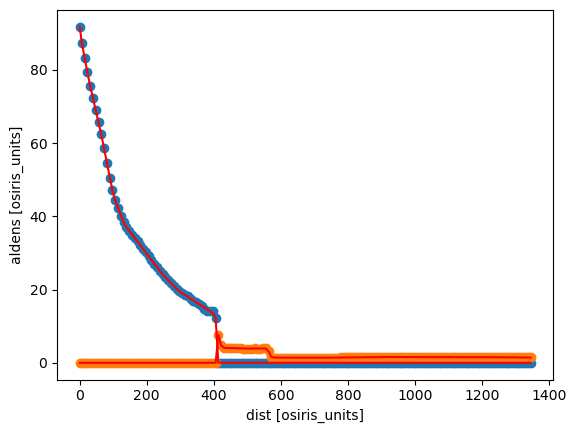

In [4]:
lineout.fit("sidens", degree=10, fit_func="piecewise", plot=True)
lineout.fit("aldens", degree=10, fit_func="piecewise", plot=True)
# lineout.show_lineout("aldens")

'if(x2 < 3.38311e+02, x2*(3.21423e-05) + (1.52637e-02), if(x2 < 4.58537e+02, x2*(-6.97463e-05) + (4.97337e-02), if(x2 < 5.27973e+02, x2*(-4.02293e-06) + (1.95971e-02), if(x2 < 5.5993e+02, x2*(-4.1848e-05) + (3.95677e-02), if(x2 < 5.75994e+02, x2*(-1.03501e-03) + (5.95671e-01), if(x2 < 6.20757e+02, x2*(1.42417e-05) + (-8.69459e-03), if(x2 < 6.69578e+02, x2*(-3.47200e-06) + (2.30135e-03), if(x2 < 7.30063e+02, x2*(1.56914e-06) + (-1.07409e-03), if(x2 < 9.73312e+02, x2*(5.36391e-08) + (3.23196e-05), if(x2 < 1.34491e+03, x2*(-2.14282e-07) + (2.93091e-04), 0.0002930907007658161))))))))))'

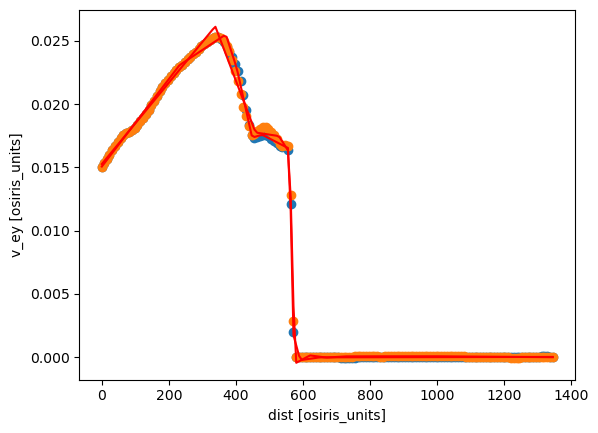

In [6]:
lineout.fit('v_iy', degree=10, fit_func="piecewise", plot=True)
lineout.fit('v_ey', degree=10, fit_func="piecewise", plot=True)

'if(x2 < 3.5696e+02, x2*(-1.95424e-06) + (5.83203e-02), if(x2 < 4.18958e+02, x2*(1.54421e-04) + (2.5004e-03), if(x2 < 4.21452e+02, x2*(4.61835e-03) + (-1.86770e+00), if(x2 < 4.89932e+02, x2*(2.11874e-04) + (-1.05807e-02), if(x2 < 5.60148e+02, x2*(1.07664e-04) + (4.04749e-02), if(x2 < 5.71448e+02, x2*(-4.05641e-03) + (2.37298e+00), if(x2 < 5.74808e+02, x2*(-3.06452e-03) + (1.80616e+00), if(x2 < 6.57745e+02, x2*(1.11483e-05) + (3.82409e-02), if(x2 < 9.31484e+02, x2*(-8.47226e-06) + (5.11462e-02), if(x2 < 1.34491e+03, x2*(7.95611e-06) + (3.58435e-02), 0.03584345557177722))))))))))'

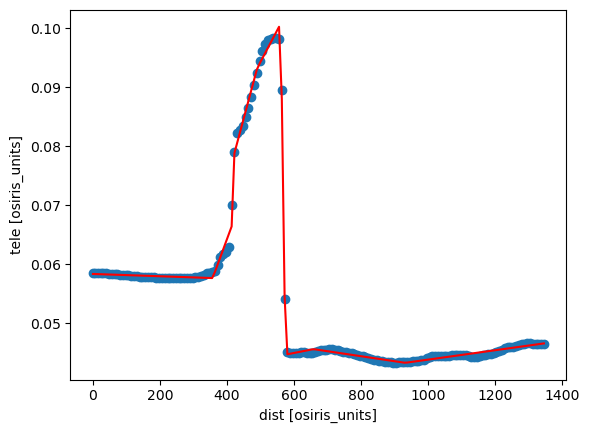

In [7]:
lineout.fit('tele', degree=10, fit_func="piecewise", plot=True)

'if(x2 < 1.74191e+02, x2*(-6.24209e-06) + (5.38594e-03), if(x2 < 1.91171e+02, x2*(1.75840e-06) + (3.99232e-03), if(x2 < 2.58196e+02, x2*(-4.30519e-06) + (5.15150e-03), if(x2 < 2.86875e+02, x2*(-3.29855e-06) + (4.89159e-03), if(x2 < 4.66246e+02, x2*(-2.38416e-06) + (4.62928e-03), if(x2 < 5.60469e+02, x2*(1.40140e-06) + (2.86427e-03), if(x2 < 5.79636e+02, x2*(-1.00313e-04) + (5.98721e-02), if(x2 < 6.86219e+02, x2*(7.44341e-07) + (1.29564e-03), if(x2 < 1.03265e+03, x2*(1.82353e-07) + (1.68129e-03), if(x2 < 1.34491e+03, x2*(-2.73111e-07) + (2.15162e-03), 0.0021516198958419076))))))))))'

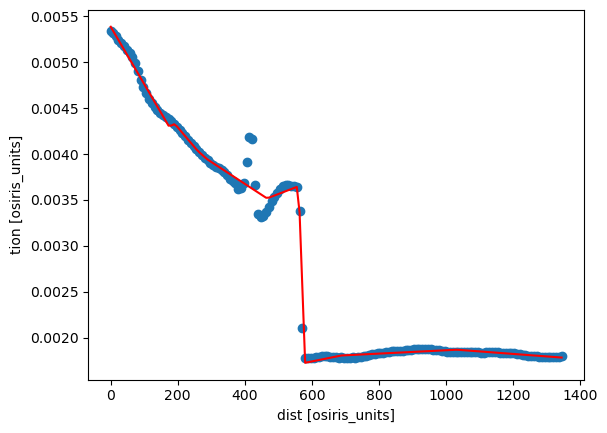

In [8]:
lineout.fit('tion', degree=10, fit_func="piecewise", plot=True)


'if(x2 < 5.98798e+01, x2*(-7.05073e-07) + (8.03126e-04), if(x2 < 1.5291e+02, x2*(-1.02528e-05) + (1.37484e-03), if(x2 < 3.49626e+02, x2*(3.44807e-06) + (-7.20156e-04), if(x2 < 4.03915e+02, x2*(-4.86701e-08) + (5.02396e-04), if(x2 < 4.70355e+02, x2*(3.7401e-06) + (-1.02794e-03), if(x2 < 5.88632e+02, x2*(-1.29521e-06) + (1.34044e-03), if(x2 < 9.89785e+02, x2*(2.62780e-07) + (4.23353e-04), if(x2 < 1.09022e+03, x2*(-7.32347e-07) + (1.40831e-03), if(x2 < 1.10581e+03, x2*(2.8239e-07) + (3.02025e-04), if(x2 < 1.34491e+03, x2*(5.82344e-07) + (-2.96661e-05), -2.9666146684773618e-05))))))))))'

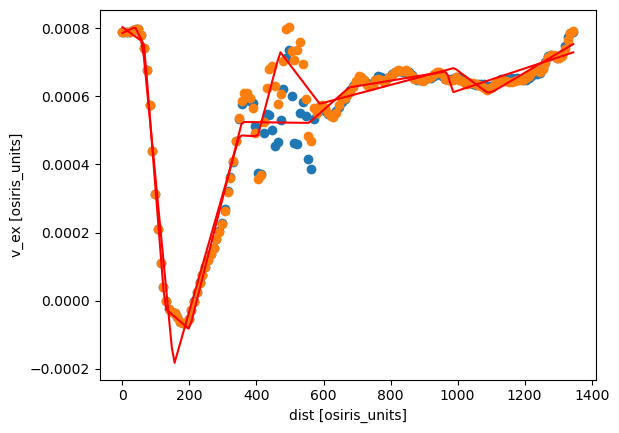

In [9]:
lineout.fit('v_ix', degree=10, fit_func="piecewise", plot=True)
lineout.fit('v_ex', degree=10, fit_func="piecewise", plot=True)

'if(x2 < 3.8778e+02, x2*(2.00047e-07) + (8.21411e-05), if(x2 < 4.03732e+02, x2*(-1.33787e-04) + (5.20394e-02), if(x2 < 4.24952e+02, x2*(1.33873e-04) + (-5.60236e-02), if(x2 < 5.48231e+02, x2*(-1.03316e-05) + (5.25665e-03), if(x2 < 5.61554e+02, x2*(2.89032e-04) + (-1.58864e-01), if(x2 < 5.9015e+02, x2*(-1.18362e-04) + (6.99099e-02), if(x2 < 8.78896e+02, x2*(-2.0678e-07) + (1.80721e-04), if(x2 < 1.03047e+03, x2*(1.40106e-07) + (-1.24156e-04), if(x2 < 1.09465e+03, x2*(-7.30186e-09) + (2.77433e-05), if(x2 < 1.34491e+03, x2*(5.36096e-09) + (1.3882e-05), 1.3881998890217663e-05))))))))))'

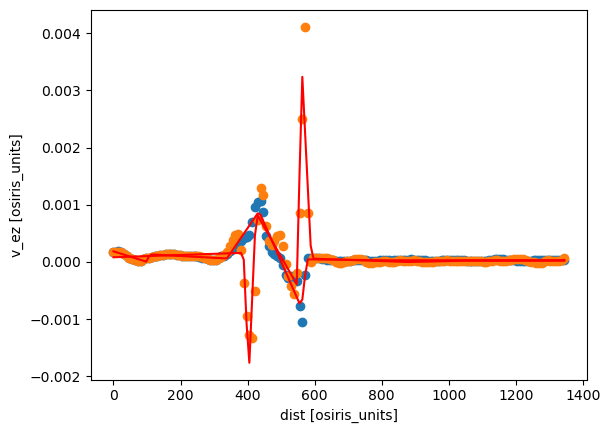

In [10]:
lineout.fit('v_iz', degree=10, fit_func="piecewise", plot=True)
lineout.fit('v_ez', degree=10, fit_func="piecewise", plot=True)

'if(x2 < 3.66579e+02, x2*(1.63101e-11) + (2.19860e-07), if(x2 < 3.74179e+02, x2*(-1.08346e-05) + (3.97197e-03), if(x2 < 4.15991e+02, x2*(6.48514e-06) + (-2.50871e-03), if(x2 < 4.45937e+02, x2*(-6.55667e-07) + (4.61797e-04), if(x2 < 5.48641e+02, x2*(-6.43937e-07) + (4.56566e-04), if(x2 < 5.87017e+02, x2*(-2.85089e-06) + (1.66739e-03), if(x2 < 7.25017e+02, x2*(5.38008e-08) + (-3.77127e-05), if(x2 < 9.27416e+02, x2*(-8.08408e-09) + (7.15485e-06), if(x2 < 1.16043e+03, x2*(1.98694e-09) + (-2.18517e-06), if(x2 < 1.34491e+03, x2*(-4.82228e-10) + (6.80131e-07), 6.801312951294992e-07))))))))))'

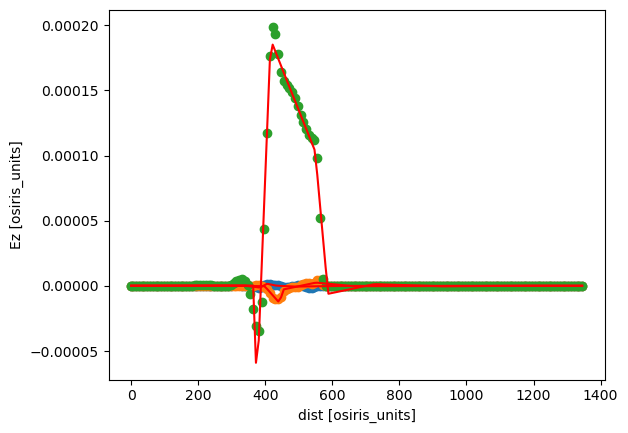

In [11]:
lineout.fit('Ex', degree=10, fit_func="piecewise", plot=True)
lineout.fit('Ey', degree=10, fit_func="piecewise", plot=True)
lineout.fit('Ez', degree=10, fit_func="piecewise", plot=True)

'if(x2 < 1.07973e+01, x2*(-4.99347e-06) + (8.97743e-06), if(x2 < 3.8596e+02, x2*(3.05501e-07) + (-4.82370e-05), if(x2 < 4.04108e+02, x2*(-2.70277e-05) + (1.05013e-02), if(x2 < 4.87746e+02, x2*(9.69728e-06) + (-4.33959e-03), if(x2 < 4.88017e+02, x2*(-2.15012e-03) + (1.04910e+00), if(x2 < 5.37933e+02, x2*(1.34605e-05) + (-6.76114e-03), if(x2 < 5.99498e+02, x2*(-6.61135e-06) + (4.03619e-03), if(x2 < 9.12327e+02, x2*(-2.65876e-07) + (2.32095e-04), if(x2 < 1.29116e+03, x2*(-3.07288e-07) + (2.69876e-04), if(x2 < 1.34491e+03, x2*(8.55851e-07) + (-1.23192e-03), -0.0012319177245053562))))))))))'

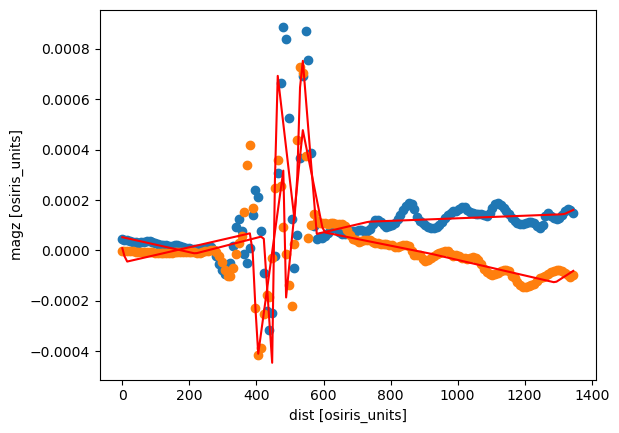

In [12]:
lineout.fit('magy', degree=10, fit_func="piecewise", plot=True)
lineout.fit('magz', degree=10, fit_func="piecewise", plot=True)